# Cài đặt thư viện

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import cv2
from PIL import Image

data_df = pd.read_csv("prepared_data_book.csv")

# Phân tích sơ lược về tổng thể dữ liệu

In [ ]:
data_df.head(1)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4


Tạo một dataset mới để dễ trực quan hơn.

In [ ]:
eda_df = data_df.drop(['product_id', 'cover_link'], axis=1)

##  Tổng quan

### Giá
* original_price
* current_price

<ipython-input-4-bce33aae70b6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(eda_df.original_price, color='gray', shade=True, label='Original')
<ipython-input-4-bce33aae70b6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(eda_df.current_price, color='g', shade=True, label='Current')


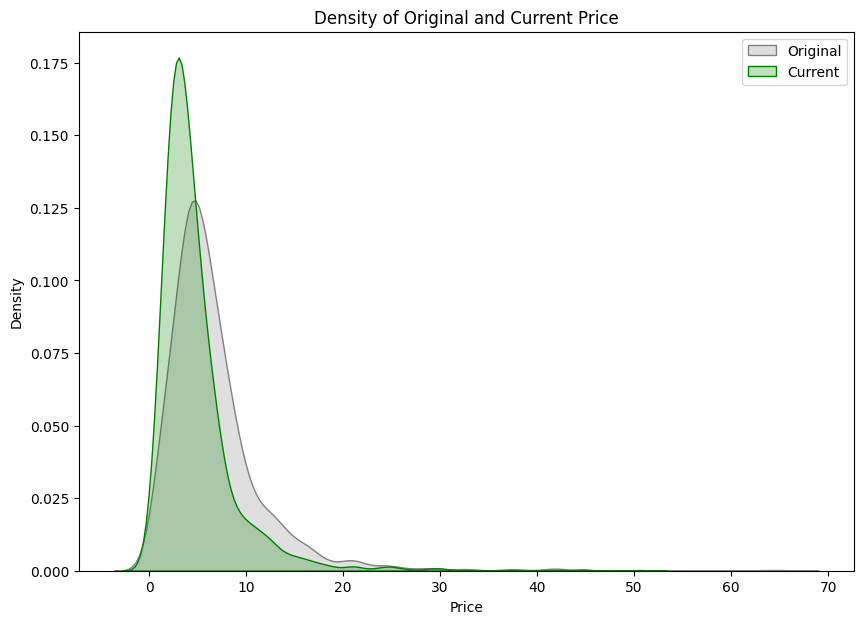

In [ ]:
fig = plt.subplots(figsize=(10, 7))

ax = sns.kdeplot(eda_df.original_price, color='gray', shade=True, label='Original')
ax = sns.kdeplot(eda_df.current_price, color='g', shade=True, label='Current')

plt.xlabel('Price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

Nhìn vào biểu đồ, ta thấy giá của hầu hết các cuốn sách đều dưới 20 đô. Chứng tỏ một điều đáng quan tâm là giá sách ở Việt Nam khá rẻ.



```
# This is formatted as code
```

### Giá giảm trên mỗi loại sách

Ta sẽ xem những quyển sách được giảm như thế nào theo từng loại

In [ ]:
# Finding the mean of discount for each category.
eda_df.groupby('category').discount.mean()

category
Bài học kinh doanh                         0.263962
Kiến Thức Bách Khoa                        0.311739
Kiến thức - Bách khoa                      0.308485
Light novel                                0.250000
Lĩnh vực khác                              0.316774
Lịch Sử Thế Giới                           0.314286
Others                                     0.230339
Sách Chiêm Tinh - Horoscope                0.259286
Sách Học Tiếng Anh                         0.310750
Sách Học Tiếng Hoa                         0.182857
Sách Làm Cha Mẹ                            0.308125
Sách Marketing - Bán hàng                  0.254500
Sách giáo dục                              0.291538
Sách kinh tế học                           0.324615
Sách kỹ năng làm việc                      0.296364
Sách nghệ thuật sống đẹp                   0.281552
Sách quản trị, lãnh đạo                    0.286667
Sách tài chính, tiền tệ                    0.121750
Tiểu Thuyết                                0.353910
Tiể

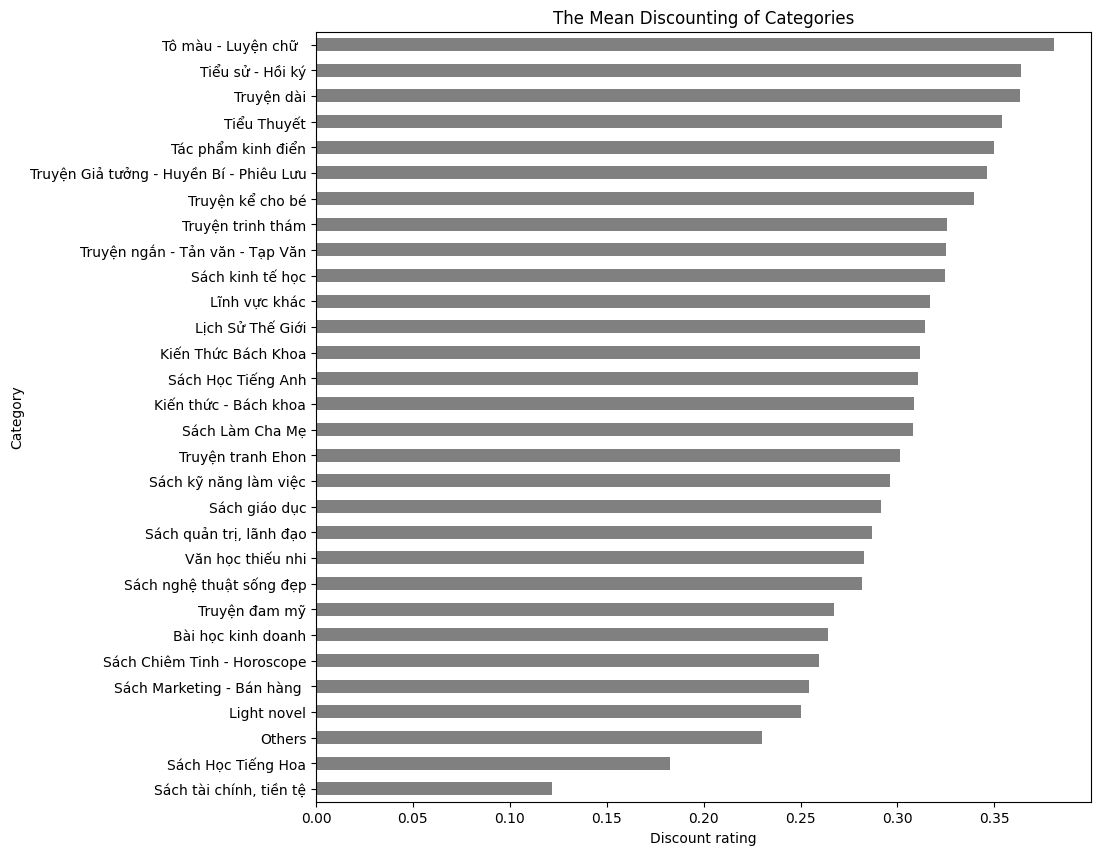

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').discount.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Discount rating')
plt.ylabel('Category')
plt.title('The Mean Discounting of Categories')
plt.show()

### Số lượng sách bán của từng loại sách

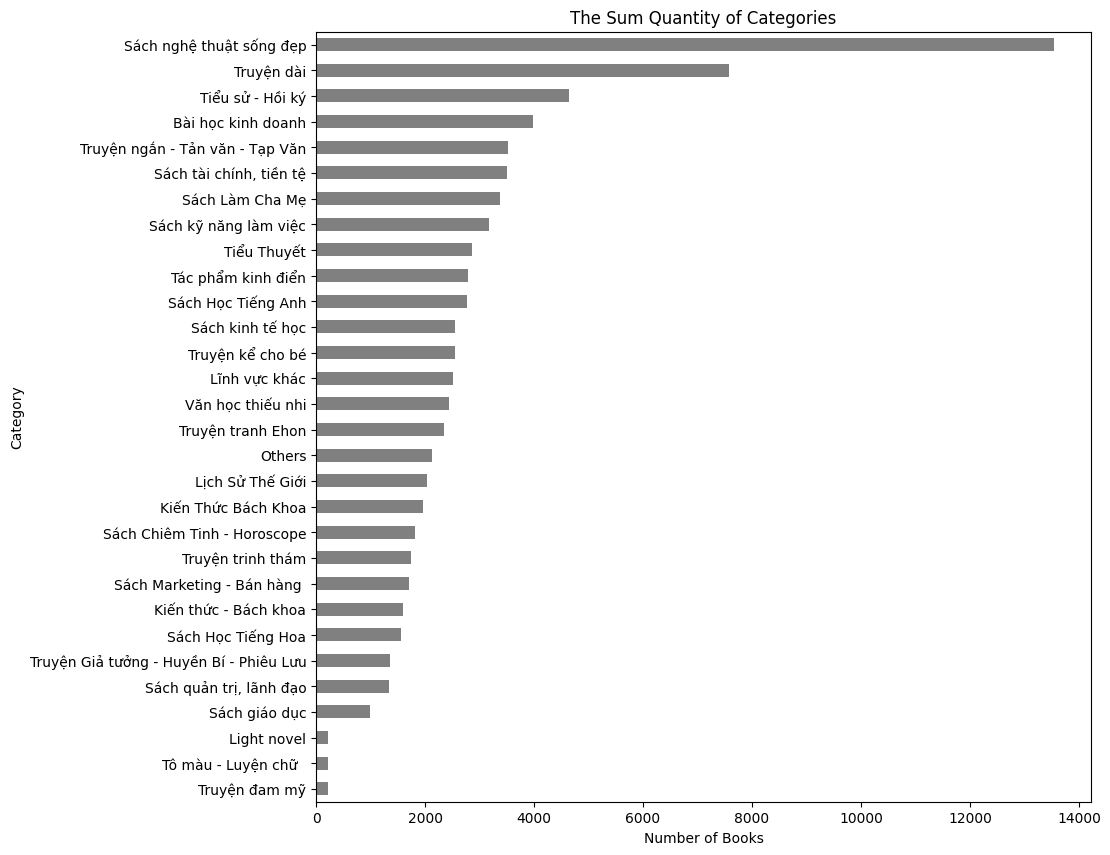

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').quantity.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.title('The Sum Quantity of Categories')
plt.show()

### Đánh giá của người mua trên từng loại sách

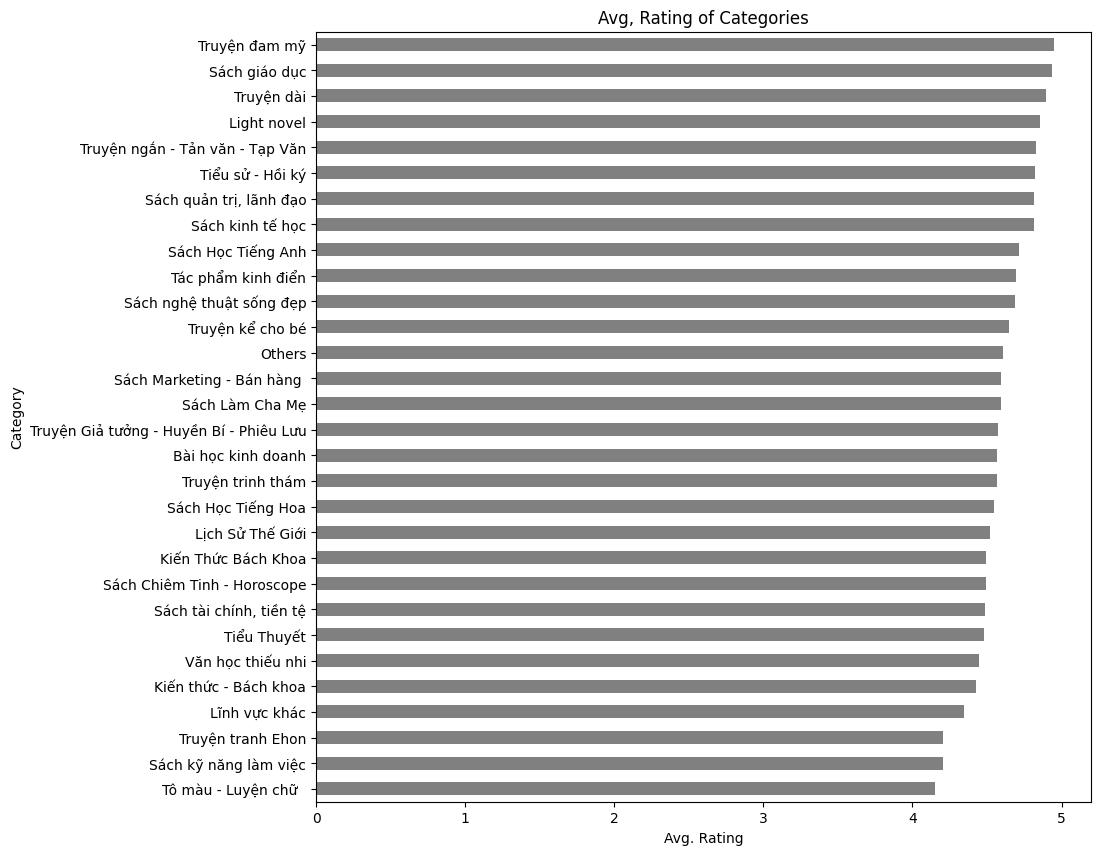

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').avg_rating.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Avg. Rating')
plt.ylabel('Category')
plt.title('Avg, Rating of Categories')
plt.show()

Mọi loại sách đều có rating trên 4. . Có thể thấy chất lượng sách TIKI khá tốt và có thể làm hài lòng người mua hàng.

## Một số câu hỏi

### Càng nhiều trang thì giá sách càng cao?

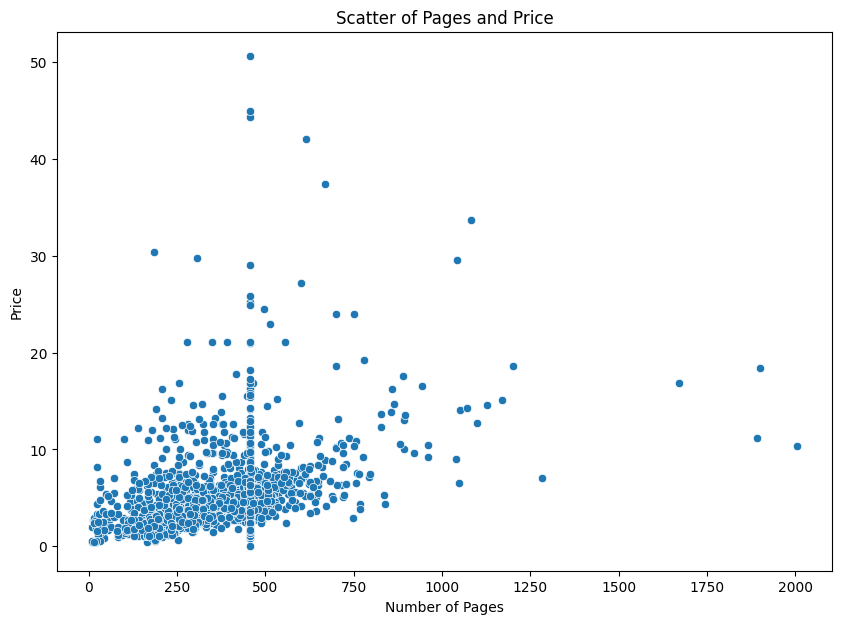

In [ ]:
fig = plt.subplots(figsize=(10, 7))

ax=sns.scatterplot(data=eda_df, x='pages', y='current_price')#, color="",color_continuous_scale='RdBu_r')

plt.xlabel('Number of Pages')
plt.ylabel('Price')
plt.title('Scatter of Pages and Price')
plt.show()

Có một số cuốn sách có khá nhiều trang nhưng giá thấp và ngược lại. Vì vậy kết luận trên là chưa đủ căn cứ

### Tác giả có tầm ảnh hưởng nhất?

Giả sử tác giả luôn nằm trong top  các tiêu chí bên dưới:
* Quantity
* Number of Reviews
* Average Rating

In [ ]:
def sort_authors_by_col(col):
    res = eda_df.groupby('authors')[col]\
        .mean()\
        .sort_values(ascending=False)\
        .index.tolist()

    return res

In [ ]:
quantity_lst = sort_authors_by_col("quantity")
n_reviews_lst = sort_authors_by_col("n_review")
avg_rating_lst = sort_authors_by_col("avg_rating")

In [ ]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) & set(list2) & set(list3))

result = top_k_common_elements(quantity_lst, n_reviews_lst, avg_rating_lst, 100)
result

['GEORGE SAMUEL CLASON', 'Jack Canfield & DD.Watkins', 'Thái Phạm']

Trong top các tiêu chí trên, Ta đã tìm thấy ba tác giả:
* Jack Canfield & Đ.D.Watkins
* LỚP GEORGE SAMUEL
* Thái Phạm

Hãy xem sơ qua một số cuốn sách của những tác giả này!

In [ ]:
# Jack Canfield & DD.Watkins
eda_df.query('authors == "Jack Canfield & DD.Watkins"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['authors'], axis=1)

,Unnamed: 0,title,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
0,285,Người Nam Châm (Tái Bản 2019),2.74,1.94,14075,Sách kỹ năng làm việc,1774,5.0,194,Unknown,0.29


In [ ]:
# Thái Phạm
eda_df.query('authors == "Thái Phạm"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['authors'], axis=1)

,Unnamed: 0,title,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
0,1084,Thiết Kế Cuộc Đời Thịnh Vượng - Design a Prosp...,12.62,12.62,15571,Others,2808,5.0,352,Nhà Xuất Bản Thế Giới,0.0
1,1132,101 Lời Khuyên Tài Chính Cá Nhân Từ Thái Phạm,12.62,12.62,381,"Sách tài chính, tiền tệ",52,5.0,408,Nhà Xuất Bản Thế Giới,0.0


In [ ]:
# GEORGE SAMUEL CLASON
eda_df.query('authors == "GEORGE SAMUEL CLASON"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['authors'], axis=1)

,Unnamed: 0,title,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
0,113,Người Giàu Có Nhất Thành Babylon (Tái Bản 2020),4.14,2.73,12729,Bài học kinh doanh,2134,5.0,216,Nhà Xuất Bản Tổng hợp TP.HCM,0.34


### Tương tự, hãy xem những cuốn sách nào bán chạy nhất:
Giả sử các cuốn sách luôn nằm trong top 5 của các tiêu chí bên dưới:
* Quantity
* Number of Reviews
* Average Rating

In [ ]:
def sort_title_by_col(col):
    # I used a trick here, because we group by title (without duplicated value).
    # The aim is to map with title against.
    res = eda_df.groupby("title")[col].max()\
        .sort_values(ascending=False)\
        .index.tolist()

    return res

In [ ]:
quantity_lst = sort_title_by_col("quantity")
n_reviews_lst = sort_title_by_col("n_review")
avg_rating_lst = sort_title_by_col("avg_rating")

In [ ]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) & set(list2) & set(list3))

result = top_k_common_elements(quantity_lst, n_reviews_lst, avg_rating_lst, 200)
result

['Từ Tốt Đến Vĩ Đại (Tái bản 2021)',
 'Giải Thích Ngữ Pháp Tiếng Anh (Với Bài Tập Và Đáp Án) (Tái Bản)',
 'Không Sợ Chậm Chỉ Sợ Dừng\xa0',
 'Muôn Kiếp Nhân Sinh (Bìa Cứng)',
 'Làm Bạn Với Bầu Trời (Bìa Mềm) (Tặng Kèm Khung Ảnh Số Lượng Có Hạn)',
 'Muôn Kiếp Nhân Sinh 2']

Và đây là top những cuốn "best-seller"

In [ ]:
eda_df.loc[eda_df.title.isin(result)].reset_index(drop=True)

,Unnamed: 0,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
0,81,Giải Thích Ngữ Pháp Tiếng Anh (Với Bài Tập Và ...,Mai Lan Hương,9.28,6.41,5616,Sách Học Tiếng Anh,1014,5.0,560,Nhà Xuất Bản Đà Nẵng,0.31
1,128,Không Sợ Chậm Chỉ Sợ Dừng,Vãn Tình,5.44,3.50,13655,Sách nghệ thuật sống đẹp,2802,5.0,364,Nhà Xuất Bản Thế Giới,0.36
2,140,Từ Tốt Đến Vĩ Đại (Tái bản 2021),Unknown,5.49,3.96,8235,Sách kinh tế học,1119,5.0,484,NXB Trẻ,0.28
3,289,Muôn Kiếp Nhân Sinh (Bìa Cứng),Nguyên Phong,9.62,6.35,7391,Others,1421,5.0,424,Nhà Xuất Bản Tổng hợp TP.HCM,0.34
4,407,Làm Bạn Với Bầu Trời (Bìa Mềm) (Tặng Kèm Khung...,Nguyễn Nhật Ánh,4.64,3.16,26282,Truyện dài,2043,5.0,220,Unknown,0.32
5,503,Muôn Kiếp Nhân Sinh 2,Nguyên Phong,11.31,7.46,23606,Others,5447,5.0,540,Nhà Xuất Bản Tổng hợp TP.HCM,0.34
